In [1]:
# Import the required libraries
import pandas as pd   # To work with dataset
import matplotlib.pyplot as plt   # To plot the visualizations
import seaborn as sns   # To plot the visualization

In [2]:
# Import the dataset from csv file
dataset = pd.read_csv('friends_episodes_v2.csv')

Lets have a glance at the dataset that we are using

In [3]:
# Print top 5 rows from the dataset
dataset.head()

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
1,1994,1,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
2,1994,1,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
3,1994,1,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438
4,1994,1,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,8.1,4274


# QUESTION :1 : What is the total duration of each season?

In [4]:
# Group the dataset by Season
grouped_season = dataset.groupby(by = 'Season')

In [5]:
# Take the sum of duration of all the episodes in the season.
# to_frame : to convert the series into the dataset
# reset_index : to make season and duration as columns of the dataset other wise, season would have been treated as index since
# we have grouped by this column initially
season_duration = grouped_season.Duration.sum().to_frame().reset_index()

Let's see the data in a tabulat format!

In [6]:
season_duration

,Season,Duration
0,1,506
1,2,528
2,3,550
3,4,544
4,5,528
5,6,582
6,7,528
7,8,528
8,9,544
9,10,412


In [7]:
# Columns in the season_duration dataset
season_duration.columns

Index(['Season', 'Duration'], dtype='object')

A picture is way more easy to understand than a tabular data, so now, lets plot and visualize the results obtained in the above dataset

Text(0, 0.5, 'Duration')

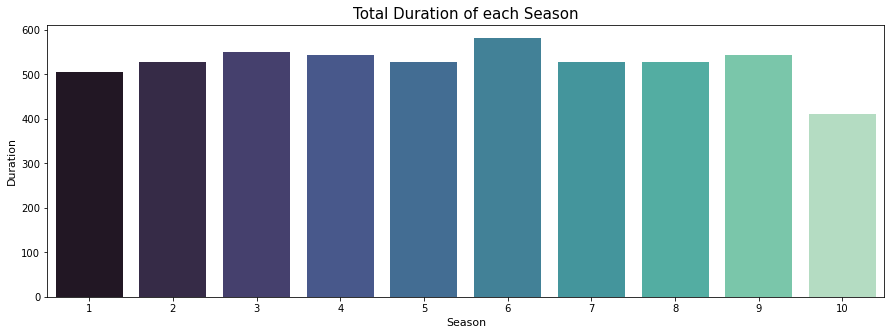

In [8]:
# The plot will be created with Season on x-axis and Duration on Y-Axis
plt.figure(figsize=(15,5))
sns.barplot(x=season_duration.Season, y=season_duration.Duration, palette='mako')
plt.title('Total Duration of each Season', fontsize=15)
plt.xlabel('Season', fontsize=11)
plt.ylabel('Duration', fontsize=11)

**So, we can see season 6 is the lengthiest season of all the seasons of F.R.I.E.N.D.S!**

# QUESTION :2 : What is the average rating of each season?

In [9]:
# From the grouped data that we calculated previously, this take mean of the Stars column per season to get the average rating
# for that season
average_rating = grouped_season.Stars.mean().to_frame().reset_index()

Let's see how each season was rated

In [10]:
average_rating

,Season,Stars
0,1,8.317391
1,2,8.458333
2,3,8.408000
3,4,8.475000
4,5,8.637500
5,6,8.496000
6,7,8.437500
7,8,8.445833
8,9,8.291667
9,10,8.677778


In [11]:
# Columns in average_rating dataset
average_rating.columns

Index(['Season', 'Stars'], dtype='object')

(8.2, 8.8)

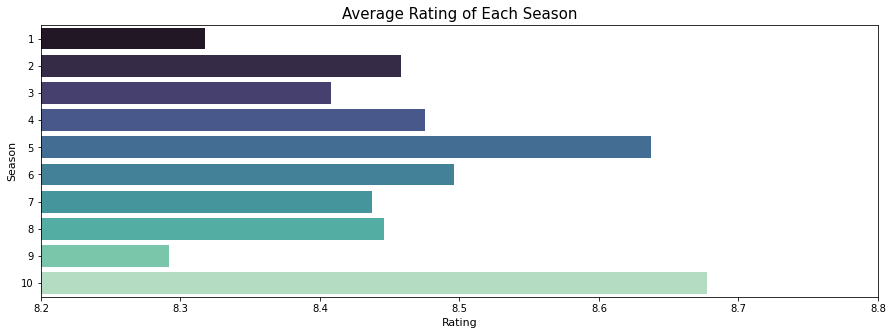

In [12]:
# This time, we will plot Stars on X- Axis and Season on Y-Axis
plt.figure(figsize=(15,5))
sns.barplot(y=average_rating.Season, x=average_rating.Stars, palette='mako', orient='h')
plt.title('Average Rating of Each Season', fontsize=15)
plt.xlabel('Rating', fontsize=11)
plt.ylabel('Season', fontsize=11)
plt.xlim(8.2,8.8)

# QUESTION :3 : What are the highest rated episodes in each season?

In [13]:
# From the grouped data, get the maximum rating obtained by an episode in each season
highest_rated_episode_per_season = grouped_season.Stars.max().to_frame().reset_index()

Let's see what is the maximum rating obtained by an episode in a season

In [14]:
highest_rated_episode_per_season

,Season,Stars
0,1,9.0
1,2,9.4
2,3,9.1
3,4,9.5
4,5,9.7
5,6,9.3
6,7,9.2
7,8,9.3
8,9,8.8
9,10,9.7


So, now we have highest rated rating of each season. What we will do is, we will iterate through our dataset and get the episode
title for each season using Season and Stars column from highest_rated_episode_per_season dataset

In [15]:
for season in highest_rated_episode_per_season.itertuples():
    print(season)

Pandas(Index=0, Season=1, Stars=9.0)
Pandas(Index=1, Season=2, Stars=9.4)
Pandas(Index=2, Season=3, Stars=9.1)
Pandas(Index=3, Season=4, Stars=9.5)
Pandas(Index=4, Season=5, Stars=9.7)
Pandas(Index=5, Season=6, Stars=9.3)
Pandas(Index=6, Season=7, Stars=9.2)
Pandas(Index=7, Season=8, Stars=9.3)
Pandas(Index=8, Season=9, Stars=8.8)
Pandas(Index=9, Season=10, Stars=9.7)


In [16]:
# Define empty list
episodes = []

# Iterate through highest_rated_episode_per_season dataset
for highest_rated in highest_rated_episode_per_season.itertuples():
    # Iterate through original data set and take only Season, Episode Title, Stars columns
    for original_dataset in dataset[['Season','Episode_Title','Stars']].itertuples():        
        # Wherever season from highest_rated_episode_per_season datset matches with season from dataset 
        # and stars from highest_rated_episode_per_season dataset matches with stars from dataset
        # add Season, Episode Title and Stars as a list item in our episodes list
        if highest_rated.Season == original_dataset.Season and highest_rated.Stars == original_dataset.Stars :
            episodes.append([original_dataset.Season, original_dataset.Episode_Title, original_dataset.Stars])

Let's see if our logic worked and we are able to get the highest rated episode per season

In [17]:
episodes

[[1, 'The One with the Blackout', 9.0],
 [2, 'The One with the Prom Video', 9.4],
 [3, 'The One with the Flashback', 9.1],
 [3, 'The One with the Morning After', 9.1],
 [4, 'The One with the Embryos', 9.5],
 [5, 'The One Where Everybody Finds Out', 9.7],
 [6, 'The One with the Proposal', 9.3],
 [7, "The One with Monica and Chandler's Wedding: Part 2", 9.2],
 [8, 'The One with the Videotape', 9.3],
 [8, 'The One with the Rumor', 9.3],
 [9, "The One with Rachel's Other Sister", 8.8],
 [10, 'The Last One', 9.7]]

HURRRAY!!!!!

In [18]:
# Convert the list into dataframe 
pd.DataFrame(episodes, columns = ['Season', 'Episode Title', 'Stars']).set_index('Season')

,Episode Title,Stars
Season,,
1,The One with the Blackout,9.0
2,The One with the Prom Video,9.4
3,The One with the Flashback,9.1
3,The One with the Morning After,9.1
4,The One with the Embryos,9.5
5,The One Where Everybody Finds Out,9.7
6,The One with the Proposal,9.3
7,The One with Monica and Chandler's Wedding: Pa...,9.2
8,The One with the Videotape,9.3


We can infer that the season 3 had two high rated episodes : *The One with the Flashback* and *The One with the Morning After*